In [1]:
#import all libraries
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# Table of contents

[Data preperation](#Data-preperation)
- [Make table mutable](#Make-features-mutable---from-different-val-to-yes-and-no)
- [Pie Chart - churn ratio](#Pie-Chart---Churn-Ratio)
- [Bar chart](#Bar-Chart---Churn-ratio)
- [Heat map - correlation with feature and churn](#Heatmap---correlation-with-feature-and-churne)

[Data modeling](#Modeling)
- [Decision tree - without Cross validation](#Decision-tree---without-Cross-validation)
- [Decision tree-accuracy - result](#Decision-tree-accuracy---result)
- [Decision tree - without Cross validation](#Decision-tree---without-Cross-validation)
- [Decision tree - without Cross validation](#Decision-tree---without-Cross-validation)
- [Decision tree - without Cross validation](#Decision-tree---without-Cross-validation)

## Data preperation

In [2]:
#Retrieve the Dataset from the CSV file
pre_df = pd.read_csv('Telco_Customer_Churn.csv')

In [87]:
#Show the first ten rows of the dataset
pre_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [88]:
#Size of whole dataset
pre_df.shape

(7043, 21)

In [5]:
#Clean table in case of duplicates
pre_df.drop_duplicates(inplace = True)

In [6]:
#Show none rows has been dropped
pre_df.shape

(7043, 21)

In [89]:
# Remove missing values
pre_df.dropna(inplace = True)

In [8]:
#Show none rows has been dropped
pre_df.shape

(7043, 21)

In [90]:
# remove customer ID, because it doesn't affect the reason question
df = pre_df.iloc[:,1:]

In [12]:
# Converting Total Charges to a numerical data type, so it is mutable 
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors= 'coerce')

In [13]:
#How many of the cols have a null value
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [93]:
# Show total amount of rows and cols
df.shape

(7043, 20)

In [94]:
#Drop rows where they haven't stayed for more than one month because of total charge is null
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df.shape

(7032, 20)

In [16]:
# check if we have any nulls left
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Make features mutable - from different val to yes and no

In [17]:
# Convert Multiple lines, Online Security, Online Backup, Device Protection, Tech support, Streaming Service, Streaming Movies, so it is mutable
df['MultipleLines'] = df['MultipleLines'].replace("No phone service", "No")
df['OnlineSecurity'] = df['OnlineSecurity'].replace("No internet service", "No")
df['OnlineBackup'] = df['OnlineBackup'].replace("No internet service", "No")
df['DeviceProtection'] = df['DeviceProtection'].replace("No internet service", "No")
df['TechSupport'] = df['TechSupport'].replace("No internet service", "No")
df['StreamingTV'] = df['StreamingTV'].replace("No internet service", "No")
df['StreamingMovies'] = df['StreamingMovies'].replace("No internet service", "No")

#converting senior citizen into category
df['SeniorCitizen'] = df['SeniorCitizen'].replace(1,"Yes")
df['SeniorCitizen'] = df['SeniorCitizen'].replace(0,"No")
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [96]:
#Show the conversion
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Pie Chart - Churn Ratio

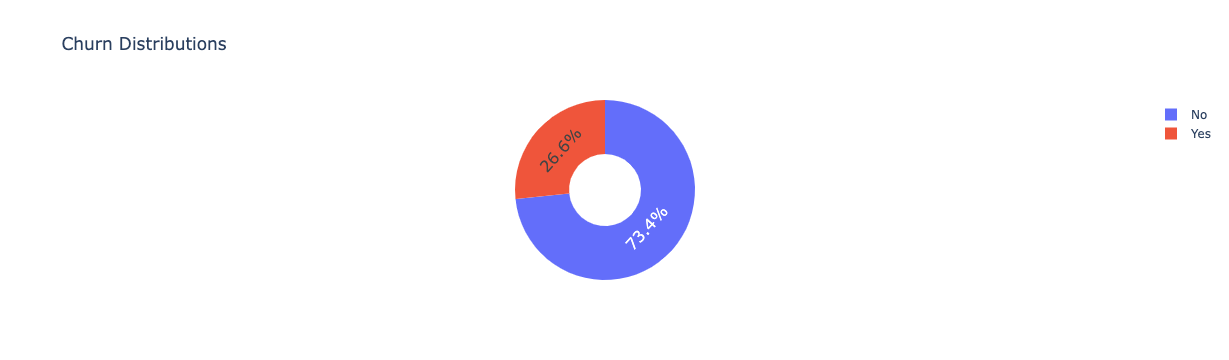

In [97]:
#Which labels should be shown
c_labels = ['No', 'Yes']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(
    go.Pie(
        labels=c_labels,
        values=df['Churn'].value_counts(),
        name="Churn"
    )
)

# Use `hole` to create a donut-like pie chart
fig.update_traces(
    hole=.4,
    hoverinfo="label+percent+name",
    textfont_size=16
)

fig.update_layout(
    title_text="Churn Distributions"
    # Add annotations in the center of the donut pies.
)
fig.show()

### Bar Chart - Churn ratio

In [ ]:
## make barchart - mangler

In [21]:
#Convertin the predictor variable ( yes and no ) in a binary numeric variable 
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

## Heatmap - correlation with feature and churn

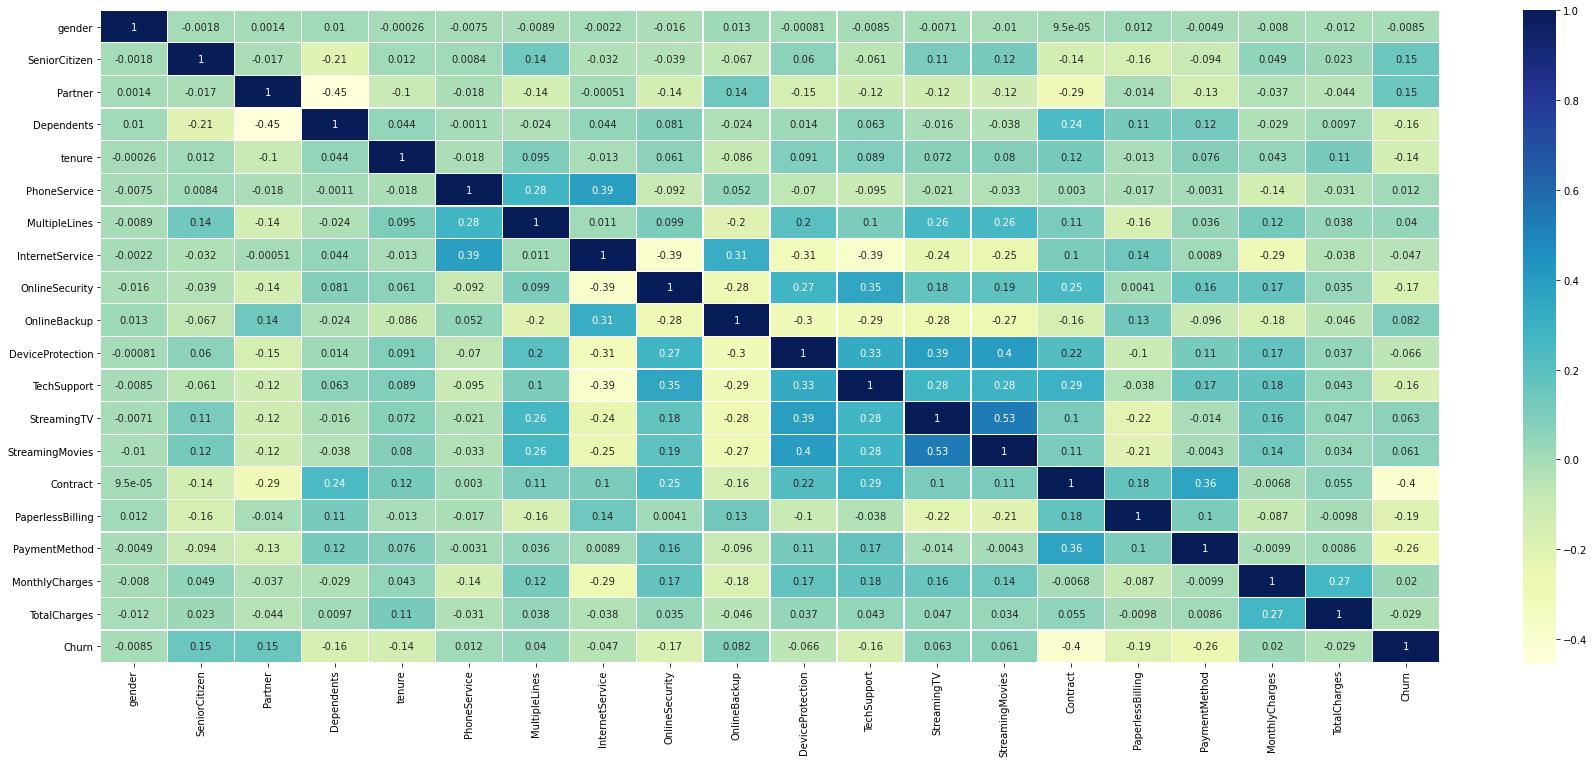

In [22]:
# Create a heat map to illustrate the correlation between feature and Churn

#make figure
plt.figure(
    figsize=(30, 12)
)

# Make the corelation 
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

# Create heatmap
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu", annot = True)

In [24]:
# Remove the two features which doesnt have a correlation to churn
df_new = df.drop(columns=['gender','PhoneService'])

In [25]:
#Get rows and columns count
df_new.shape

(7032, 18)

# Modeling

### Premodeling

In [27]:
# Remove churn for training
Features = df_new.columns.drop('Churn')

In [99]:
# Prepare split for the training data and the test data
X = df_new[Features]
y = df_new['Churn']

Use get_dummies to add the additional features, 'Type of Sale', and 'Type'. You still want to include m2 and 'Build Year'. Note that get_dummies will only create dummy features for nominal values -- it will ignore numerical features like m2 and 'Build Year'. List the dummy features that were created for the feature 'Type'.

In [103]:
X = pd.get_dummies(X)

# show the first 5 rows
X.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0


In [30]:
#Split the  Splits at 25% default
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=69
)

# Decision trees

#### https://www.kaggle.com/bhartiprasad17/customer-churn-prediction 

### Decision tree - without Cross validation

In [32]:
# Set the max depth use throughout the decision tree
maxDepth = 5

In [105]:
# different types of accuracy to test which type of hyper parameter should be used
test_depth = [3,5,10,15,20,25,200]

# loop through to show which depth gives which accuracy
for d in test_depth:
    dc = DecisionTreeClassifier(max_depth = d)
    #Train model
    dc_model = dc.fit(X_train,y_train)
    #predict
    y_pred_dc = dc_model.predict(X_test)
    print('Depth:',d)
    print('Accuracy of Decision tree classifier on test set: {:.2f}'.format(dc_model.score(X_test, y_test)))
    print('______\n')

Depth: 3
Accuracy of Decision tree classifier on test set: 0.79
______

Depth: 5
Accuracy of Decision tree classifier on test set: 0.78
______

Depth: 10
Accuracy of Decision tree classifier on test set: 0.75
______

Depth: 15
Accuracy of Decision tree classifier on test set: 0.72
______

Depth: 20
Accuracy of Decision tree classifier on test set: 0.72
______

Depth: 25
Accuracy of Decision tree classifier on test set: 0.73
______

Depth: 200
Accuracy of Decision tree classifier on test set: 0.73
______



In [34]:
#create the decision tree classifier
dc = DecisionTreeClassifier(max_depth = maxDepth)

#Train model
dc_model = dc.fit(X_train,y_train)

#predict
Decision_y_pred_rfc = dc_model.predict(X_test)


### Decision tree accuracy - result

In [106]:
print('Depth: ',maxDepth)
print('Accuracy of Decision tree classifier on test set: {:.2f}'.format(dc_model.score(X_test, y_test)))

Depth:  5
Accuracy of Decision tree classifier on test set: 0.73


In [ ]:
### Decision tree - 

In [36]:
print(classification_report(y_test,y_pred_dc))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1281
           1       0.52      0.53      0.52       477

    accuracy                           0.74      1758
   macro avg       0.67      0.67      0.67      1758
weighted avg       0.74      0.74      0.74      1758



In [37]:
dc_imp=list(dc_model.feature_importances_)

dc_colname=list(X_train.columns)

#Create dict for datafram
dc_dict={'Feature':dc_colname,'Importance':dc_imp}

#Create dataframe
dc_feature_imp=pd.DataFrame(dc_dict)

In [38]:
dc_feature_rank=dc_feature_imp.sort_values(by='Importance',ascending = False)

In [39]:
dc_feature_rank.head(10)

,Feature,Importance
26,Contract_Month-to-month,0.505002
0,tenure,0.180921
12,InternetService_Fiber optic,0.155176
2,TotalCharges,0.053858
1,MonthlyCharges,0.025204
13,InternetService_No,0.024703
10,MultipleLines_Yes,0.020197
28,Contract_Two year,0.008911
21,TechSupport_Yes,0.007339
22,StreamingTV_No,0.005336


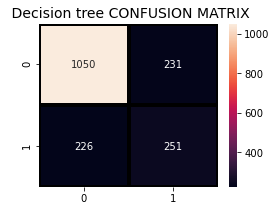

In [40]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_dc),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" Decision tree CONFUSION MATRIX",fontsize=14)
plt.show()

### With Cross Validation

In [41]:
# Evaluation with the RFECV to find the most important the features in regard to accurassy 
# Decision tree Classifier for X 

Decision_rfc = DecisionTreeClassifier(max_depth = maxDepth)

Decision_rfecv = RFECV(estimator = Decision_rfc, step=1, cv=5, scoring='accuracy')
Decision_rfecv.fit(X_train,y_train)

#Print results
print('Optimal feature amount: {}',Decision_rfecv.n_features_)
print('Chosen features:', list(X.columns[Decision_rfecv.support_]))
#print('Importance on chosen features: \n', np.absolute(rfecv.estimator_.coef_))

Optimal feature amount: {} 5
Chosen features: ['tenure', 'MonthlyCharges', 'TotalCharges', 'InternetService_Fiber optic', 'Contract_Month-to-month']


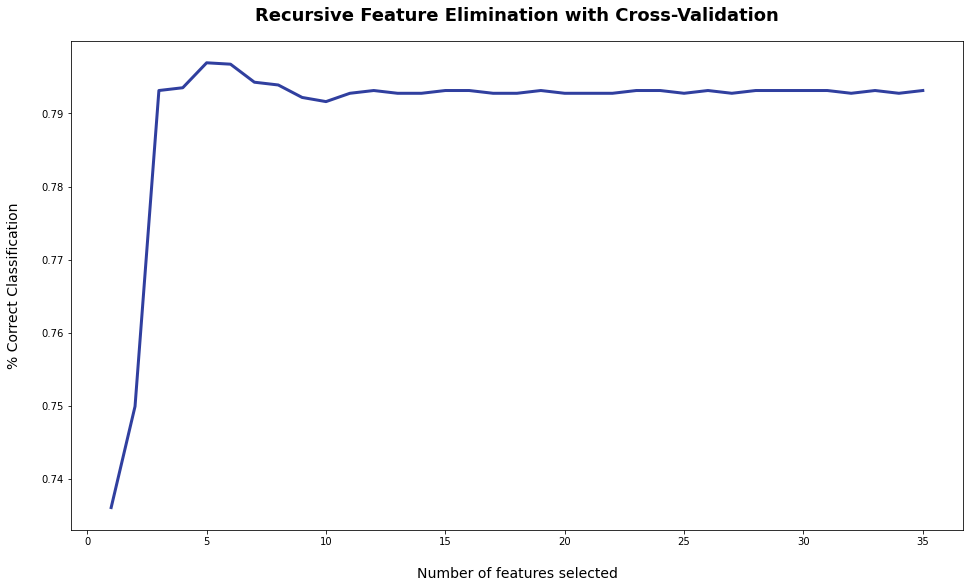

In [42]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(Decision_rfecv.grid_scores_) + 1), Decision_rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

In [43]:
# Fit the model
# we have played around with the hyperparameter max_depth between the below

dtree = DecisionTreeClassifier(max_depth = maxDepth)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [44]:
# WE find the 
dc_prediction = dtree.predict(X_test)
print(confusion_matrix(y_test, dc_prediction))
print(classification_report(y_test, dc_prediction))

[[1123  158]
 [ 234  243]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1281
           1       0.61      0.51      0.55       477

    accuracy                           0.78      1758
   macro avg       0.72      0.69      0.70      1758
weighted avg       0.77      0.78      0.77      1758



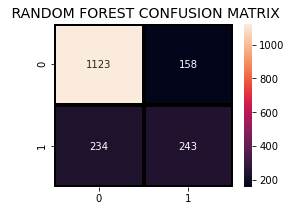

In [45]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, dc_prediction),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

## Random forrest

### before cross validation

In [46]:
X_train.shape

(5274, 35)

In [47]:
# Create random forest classifer object that uses entropy - very slow
rfc = RandomForestClassifier(criterion='entropy', random_state=0, n_jobs=-1,n_estimators=200,max_depth=11)
# Train model
rfc_model = rfc.fit(X_train, y_train)
# Predict    
y_pred_rfc = rfc_model.predict(X_test)

In [48]:
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc_model.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.78


In [49]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1281
           1       0.62      0.50      0.55       477

    accuracy                           0.78      1758
   macro avg       0.72      0.69      0.70      1758
weighted avg       0.77      0.78      0.77      1758



In [50]:
rfc_imp=list(rfc_model.feature_importances_)
rfc_colname=list(X_train.columns)

#Create dict for datafram
rfc_dict={'Feature':rfc_colname,'Importance':rfc_imp}

#Create dataframe
rfc_feature_imp=pd.DataFrame(rfc_dict)

In [51]:
rfc_feature_rank=rfc_feature_imp.sort_values(by='Importance',ascending = False)

In [52]:
rfc_feature_rank.head(10)

,Feature,Importance
0,tenure,0.141016
2,TotalCharges,0.135910
1,MonthlyCharges,0.121701
26,Contract_Month-to-month,0.093309
28,Contract_Two year,0.049976
12,InternetService_Fiber optic,0.049618
33,PaymentMethod_Electronic check,0.036146
13,InternetService_No,0.021826
27,Contract_One year,0.020714
15,OnlineSecurity_Yes,0.016756


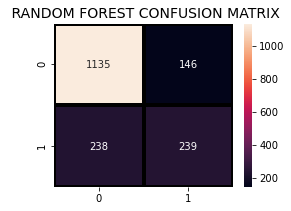

In [53]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_rfc),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

## Random forest with cross validation

In [54]:
rfc = RandomForestClassifier(criterion='entropy', random_state=0, n_jobs=-1,n_estimators=200,max_depth=11)
# Train model with Cross validation
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(5), scoring='accuracy')

rfecv_model = rfecv.fit(X_train, y_train)
# Predict    
y_pred_rfcv = rfecv_model.predict(X_test)

In [55]:
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfecv_model.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.79


In [56]:
print('Optimal feature amount: {}',rfecv_model.n_features_)
print('Chosen features:', list(X.columns[rfecv_model.support_]))

Optimal feature amount: {} 32
Chosen features: ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen_No', 'SeniorCitizen_Yes', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


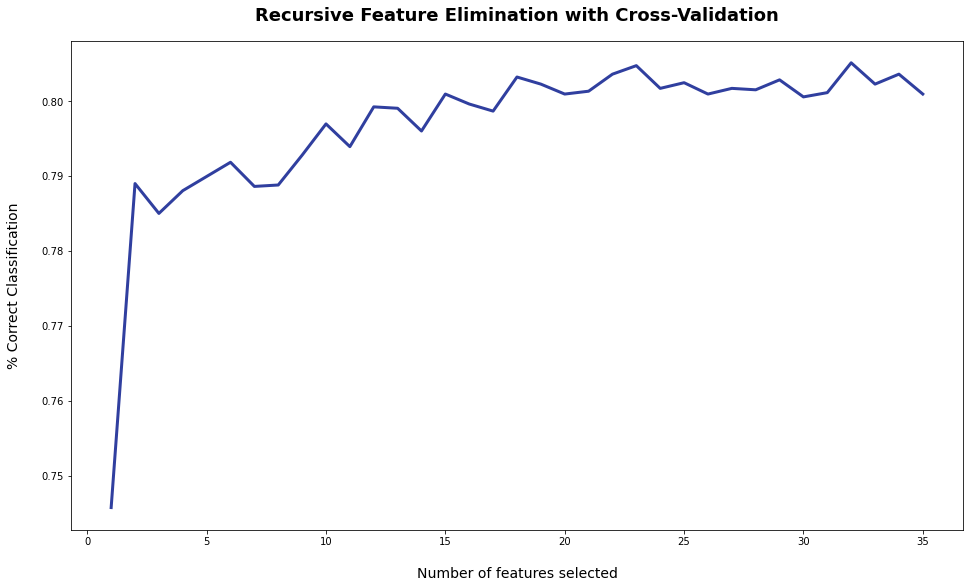

In [57]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv_model.grid_scores_) + 1), rfecv_model.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [58]:
print(classification_report(y_test,y_pred_rfcv))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1281
           1       0.64      0.53      0.58       477

    accuracy                           0.79      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.78      0.79      0.79      1758



In [59]:
rfecv_imp=rfecv_model.estimator_.feature_importances_

In [60]:
#Show which index should be deleted
print(np.where(rfecv.support_ == False)[0])

[18 22 32]


In [61]:
#Remove the none important features
X_rf = X
X_Dropped = X_rf.drop(X_rf.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

In [62]:
rfecv_colname=list(X_rf.columns)

In [63]:
#Create dict for datafram
rfecv_dict={'Feature':rfecv_colname,'Importance':rfecv_imp}

#Create dataframe
rfecv_feature_imp=pd.DataFrame(rfecv_dict)

In [64]:
rfecv_feature_rank=rfecv_feature_imp.sort_values(by='Importance',ascending = False)

In [65]:
rfecv_feature_rank.head(10)

,Feature,Importance
0,tenure,0.144967
2,TotalCharges,0.141564
1,MonthlyCharges,0.129124
24,Contract_Month-to-month,0.093312
26,Contract_Two year,0.059741
12,InternetService_Fiber optic,0.044093
30,PaymentMethod_Electronic check,0.034833
13,InternetService_No,0.023837
25,Contract_One year,0.022182
11,InternetService_DSL,0.016612


##### confusion matrix

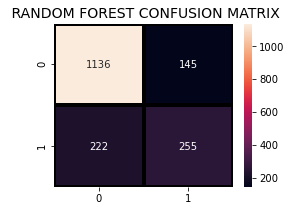

In [66]:
# Call confusion_matrix function from sklearn.metrics using actual y_test and predicted y_test data sets 
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_rfcv),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

## Logistic regression

In [67]:
df1=df

In [68]:
## Random Forrest

In [69]:
dummy_df = pd.get_dummies(df1)

In [70]:
dummy_df

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,0,1,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
7039,72,103.20,7362.90,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0
7040,11,29.60,346.45,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
7041,4,74.40,306.60,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1


In [71]:
# Establish our target feature, churn, as our y feature
y = dummy_df.Churn.values
# Drop our target feature from our features dataframe
X = dummy_df.drop('Churn', axis = 1)
# Save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

In [72]:
# Instantiate min-max scaling object
mm = MinMaxScaler()
# Fit and transform our feature dataframe
X = pd.DataFrame(mm.fit_transform(X))
# Reassign column names so new dataframe has corresponding names
X.columns = cols

In [73]:
# Perform train test split from our target feature series and the predicting feature dataframe (set test size to 25% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

In [74]:
# Instantiate a Logistic Regression model without an intercept. C is set to an arbitrarily large number. Use 'liblinear' solver method.
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver = 'liblinear')
# Fit the model to our X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [75]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [76]:
# Find residual differences between train data and predicted train data
residuals = np.abs(y_train - y_hat_train)
# Print value counts of our predicted values 
print(pd.Series(residuals).value_counts())
print('----------------------------------')
# Print normalized value counts of our predicted values
print(pd.Series(residuals).value_counts(normalize = True))

0    4260
1    1014
dtype: int64
----------------------------------
0    0.807736
1    0.192264
dtype: float64


In [77]:
# Repeat previous step with test data
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('---------------------------------')
print(pd.Series(residuals).value_counts(normalize = True))

0    1391
1     367
dtype: int64
---------------------------------
0    0.79124
1    0.20876
dtype: float64


In [78]:
#confusion matrix


In [79]:
# Call confusion_matrix function from sklearn.metrics using actual y_test and predicted y_test data sets 
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1153  147]
 [ 220  238]]


In [80]:
from sklearn.metrics import f1_score

f1_train = f1_score(y_train, y_hat_train)
f1_test = f1_score(y_test, y_hat_test)

In [81]:
print(f1_train)
print(f1_test)

0.6138613861386139
0.5646500593119811


In [82]:
#print(accuracy_train)